# Importing The Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, f1_score, confusion_matrix,
                           roc_curve, auc, classification_report, roc_auc_score)
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')

# Loading The Dataset

In [2]:
data = load_breast_cancer()
X = data.data
y = data.target
feature_names = data.feature_names
target_names = data.target_names

In [3]:
print("Dataset Information:")
print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"Feature names: {len(feature_names)}")
print(f"Target names: {target_names}")
print(f"Class distribution: {np.bincount(y)}")
print(f"Malignant (0): {np.sum(y == 0)}, Benign (1): {np.sum(y == 1)}")

Dataset Information:
Features shape: (569, 30)
Target shape: (569,)
Feature names: 30
Target names: ['malignant' 'benign']
Class distribution: [212 357]
Malignant (0): 212, Benign (1): 357


# Preparing + Splitting The Data

In [4]:
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y
df['diagnosis'] = df['target'].map({0: 'malignant', 1: 'benign'})

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [6]:
print(f"\nTrain set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")
print(f"Train set class distribution: {np.bincount(y_train)}")
print(f"Test set class distribution: {np.bincount(y_test)}")


Train set size: 455
Test set size: 114
Train set class distribution: [170 285]
Test set class distribution: [42 72]


# Exploratory Data Analysis

Basic Statistics of Features

In [7]:
print(df.describe().T)

                         count        mean         std         min  \
mean radius              569.0   14.127292    3.524049    6.981000   
mean texture             569.0   19.289649    4.301036    9.710000   
mean perimeter           569.0   91.969033   24.298981   43.790000   
mean area                569.0  654.889104  351.914129  143.500000   
mean smoothness          569.0    0.096360    0.014064    0.052630   
mean compactness         569.0    0.104341    0.052813    0.019380   
mean concavity           569.0    0.088799    0.079720    0.000000   
mean concave points      569.0    0.048919    0.038803    0.000000   
mean symmetry            569.0    0.181162    0.027414    0.106000   
mean fractal dimension   569.0    0.062798    0.007060    0.049960   
radius error             569.0    0.405172    0.277313    0.111500   
texture error            569.0    1.216853    0.551648    0.360200   
perimeter error          569.0    2.866059    2.021855    0.757000   
area error          

Correlation Heatmap

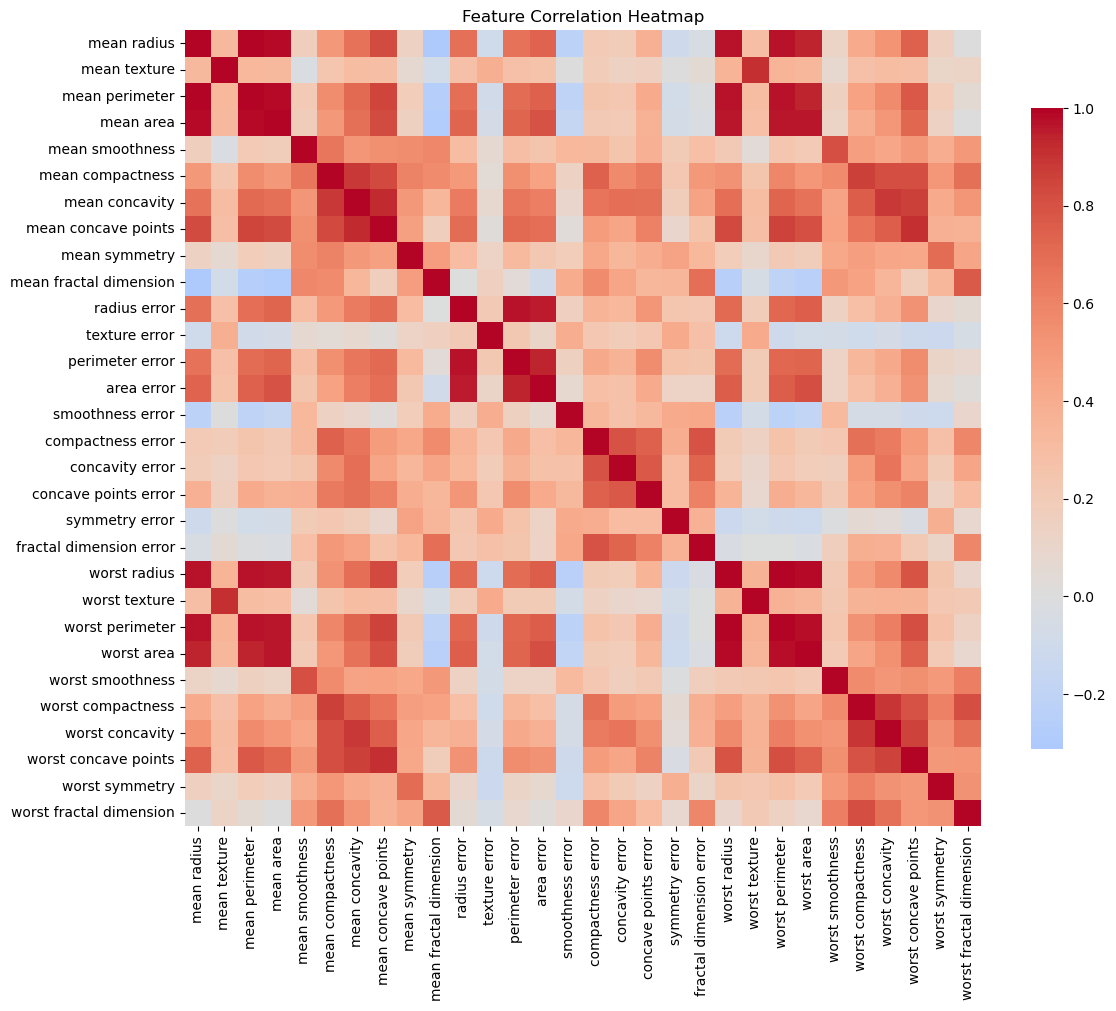

In [8]:
plt.figure(figsize=(12, 10))
correlation_matrix = df.iloc[:, :-2].corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', center=0,
            square=True, cbar_kws={"shrink": .8})
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.show()

Examining Labels Distribution

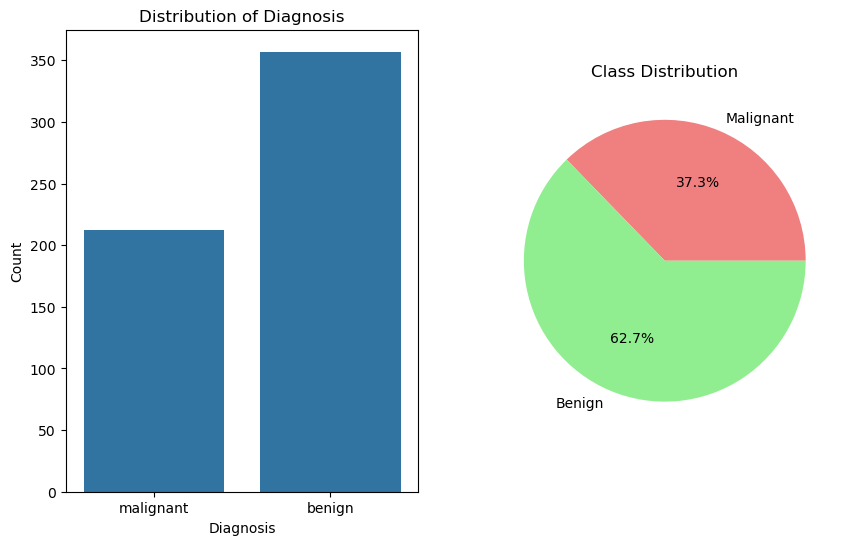

In [9]:
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.countplot(x='diagnosis', data=df)
plt.title('Distribution of Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
plt.pie([np.sum(y == 0), np.sum(y == 1)],
        labels=['Malignant', 'Benign'],
        autopct='%1.1f%%', colors=['lightcoral', 'lightgreen'])
plt.title('Class Distribution')
plt.show()

Feature Distributions by Class

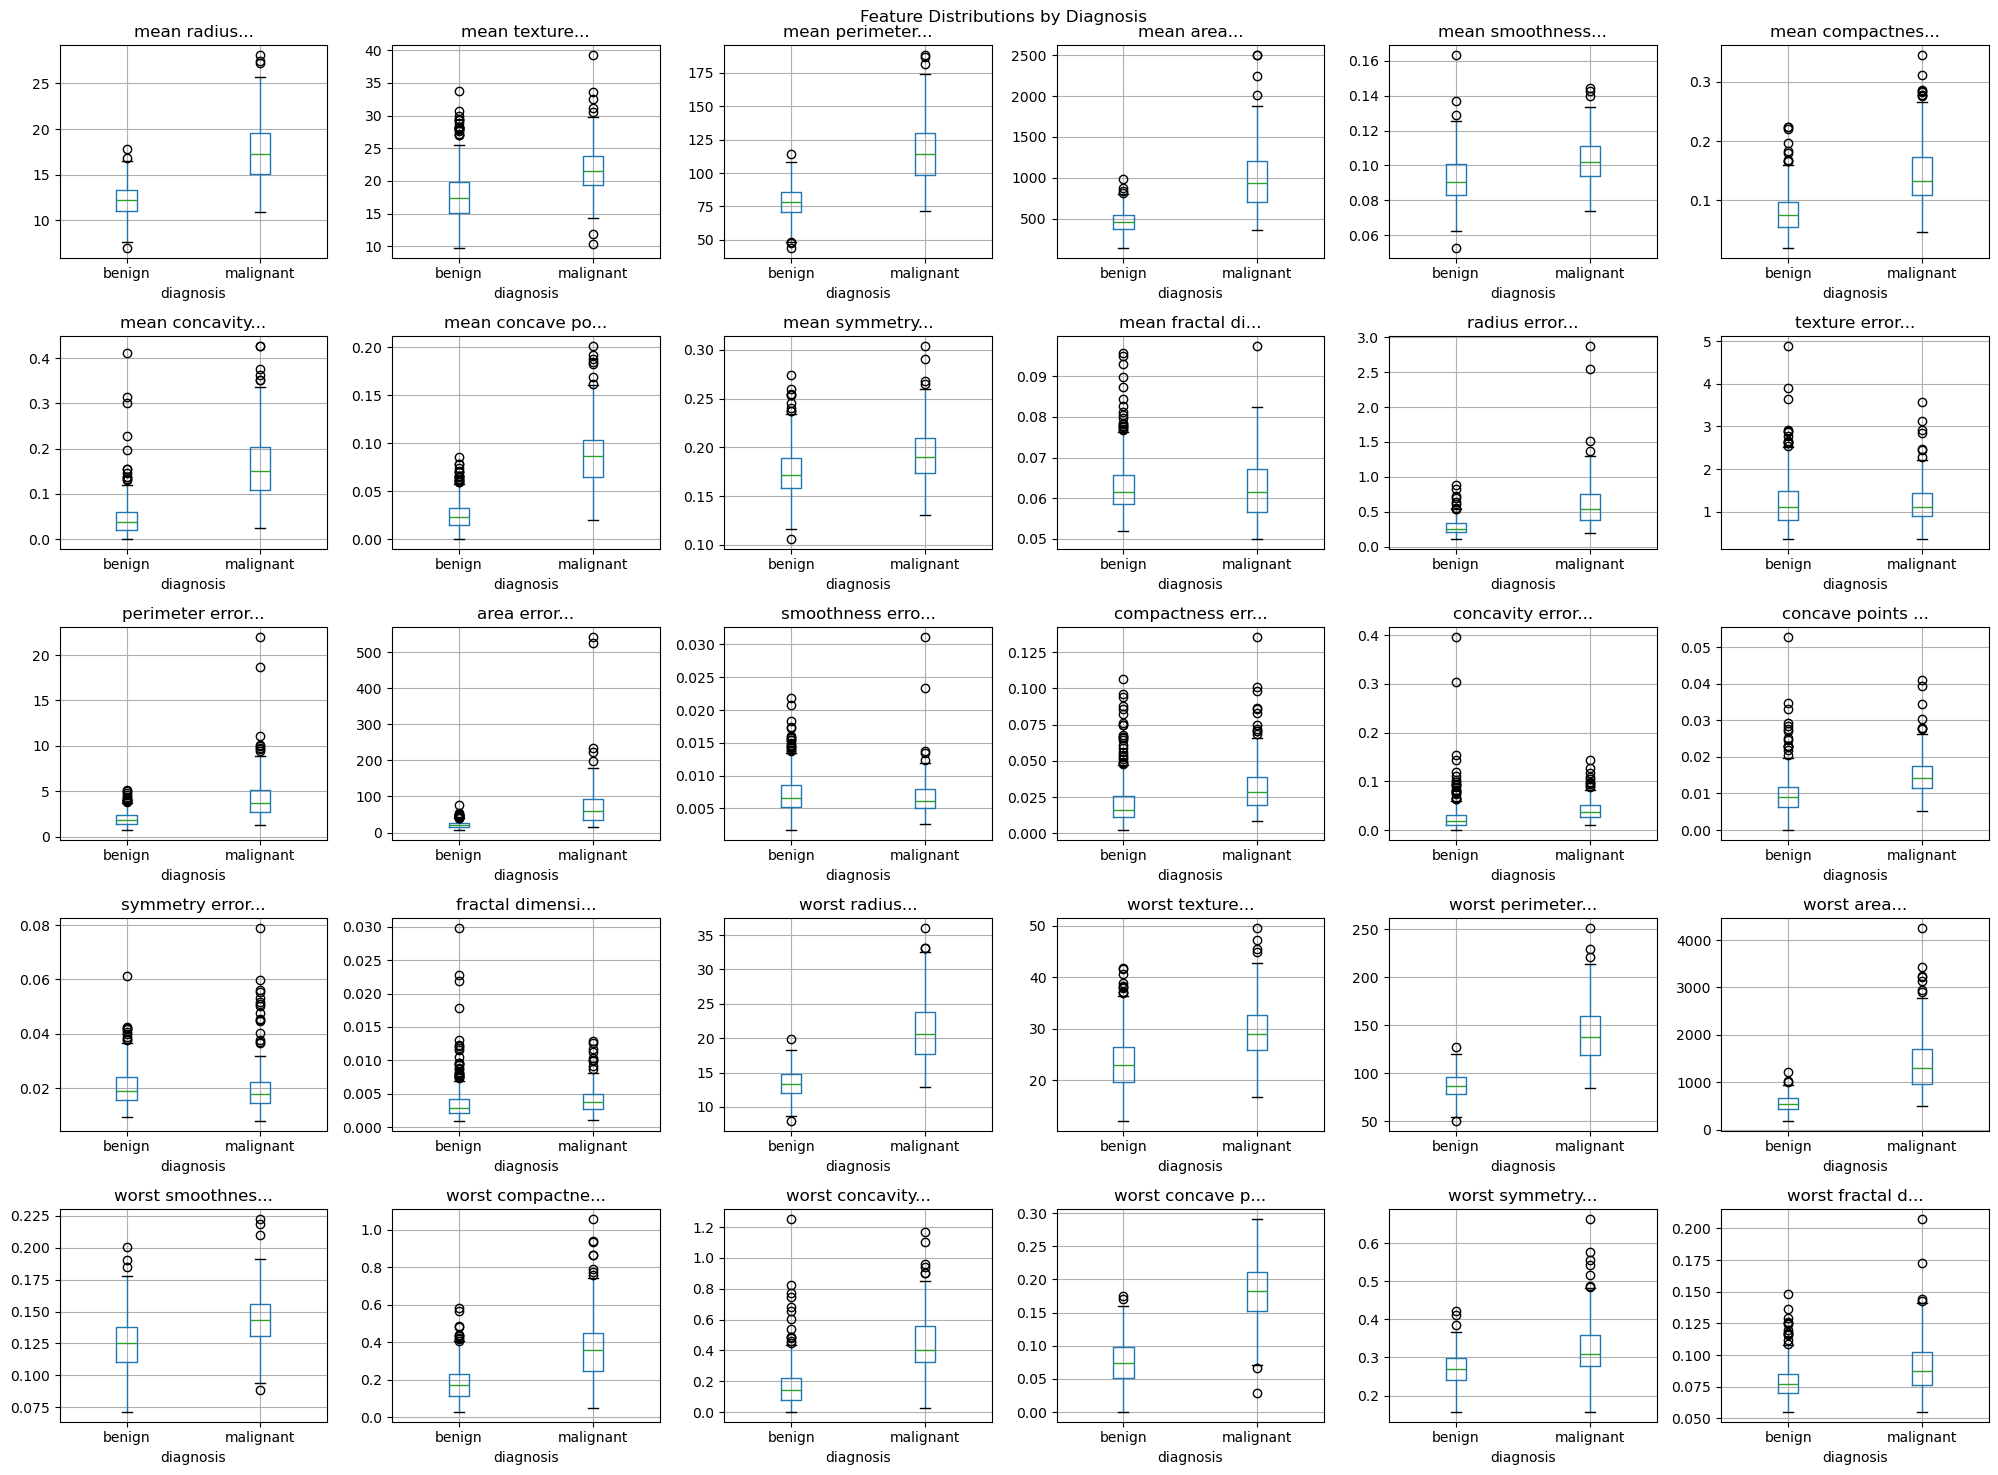

In [10]:
fig, axes = plt.subplots(5, 6, figsize=(20, 15))
axes = axes.ravel()

for i, feature in enumerate(feature_names[:30]):
    df.boxplot(column=feature, by='diagnosis', ax=axes[i])
    axes[i].set_title(f'{feature[:15]}...')

plt.suptitle('Feature Distributions by Diagnosis')
plt.tight_layout()
plt.show()

Checking for Missing Values

In [11]:
print(f"\nMissing values in dataset: {df.isnull().sum().sum()}")


Missing values in dataset: 0


Feature Scaling Visualization

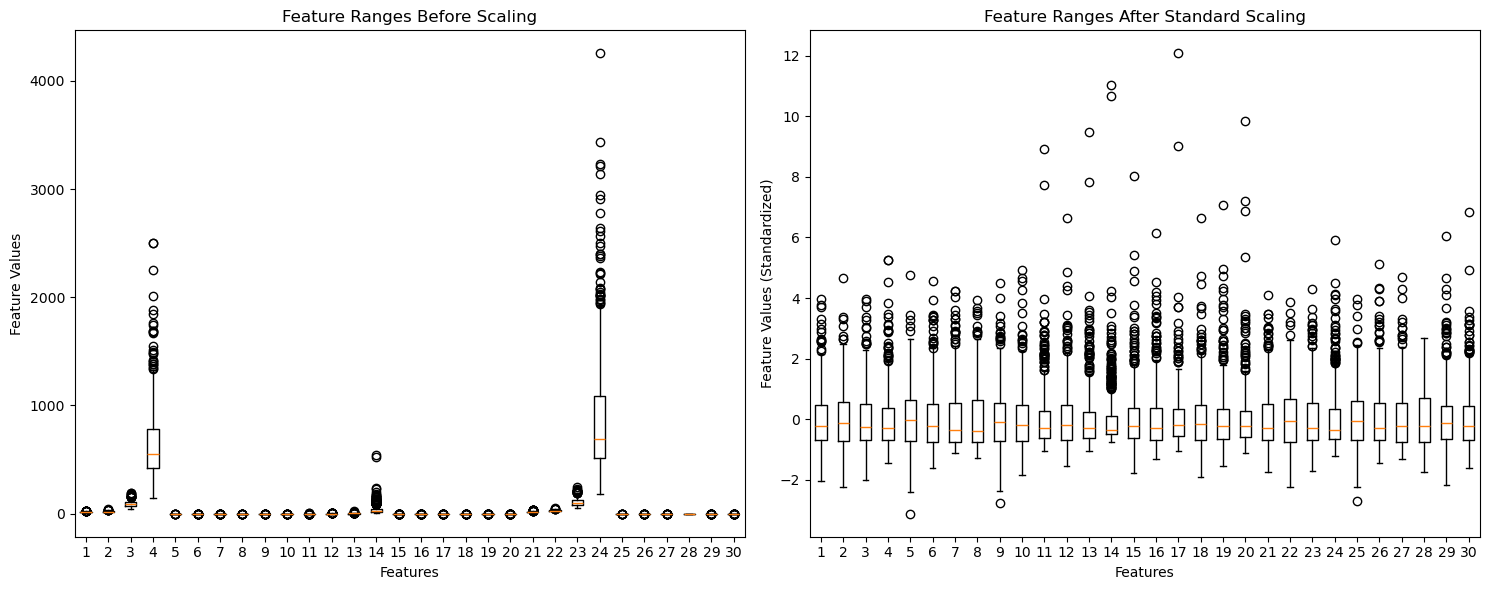

In [12]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

axes[0].boxplot(X)
axes[0].set_title('Feature Ranges Before Scaling')
axes[0].set_ylabel('Feature Values')
axes[0].set_xlabel('Features')

axes[1].boxplot(X_scaled)
axes[1].set_title('Feature Ranges After Standard Scaling')
axes[1].set_ylabel('Feature Values (Standardized)')
axes[1].set_xlabel('Features')

plt.tight_layout()
plt.show()